In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [ ]:
df = pd.read_csv("/content/sample_data/Renewable.csv")


                  Time  Energy delta[Wh]  GHI  temp  pressure  humidity  \
0  2017-01-01 00:00:00                 0  0.0   1.6      1021       100   
1  2017-01-01 00:15:00                 0  0.0   1.6      1021       100   
2  2017-01-01 00:30:00                 0  0.0   1.6      1021       100   
3  2017-01-01 00:45:00                 0  0.0   1.6      1021       100   
4  2017-01-01 01:00:00                 0  0.0   1.7      1020       100   

   wind_speed  rain_1h  snow_1h  clouds_all  isSun  sunlightTime  dayLength  \
0         4.9      0.0      0.0         100      0             0        450   
1         4.9      0.0      0.0         100      0             0        450   
2         4.9      0.0      0.0         100      0             0        450   
3         4.9      0.0      0.0         100      0             0        450   
4         5.2      0.0      0.0         100      0             0        450   

   SunlightTime/daylength  weather_type  hour  month  
0                  

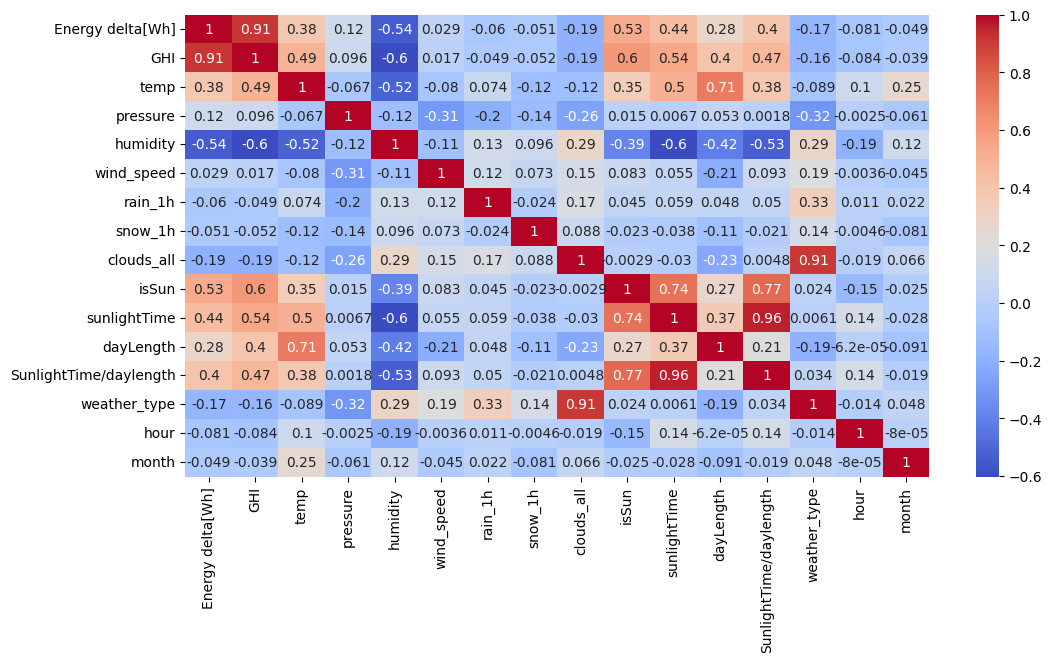

In [ ]:
df = pd.read_csv("/content/sample_data/Renewable.csv")

print(df.head())
print(df.info())

print(df.isnull().sum())

df_numeric = df.drop('Time', axis=1)

plt.figure(figsize=(12,6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm")
plt.show()

In [ ]:
X = df.drop(["Energy delta[Wh]", "Time"], axis=1)
y = df["Energy delta[Wh]"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

RMSE: 327.02556069771435
R²: 0.9023569898442193


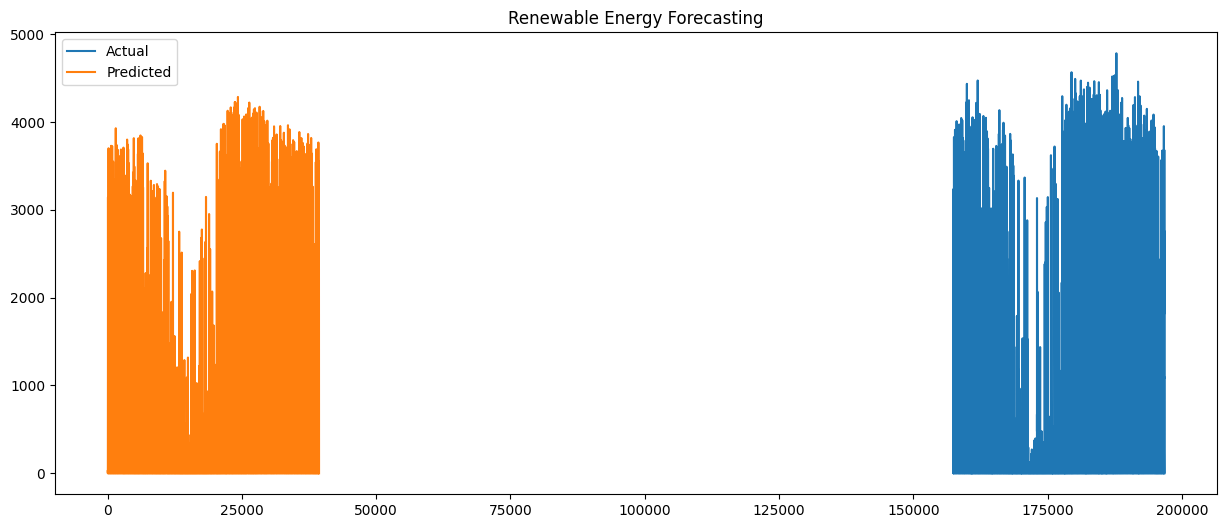

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(y_test, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.legend()
plt.title("Renewable Energy Forecasting")
plt.show()


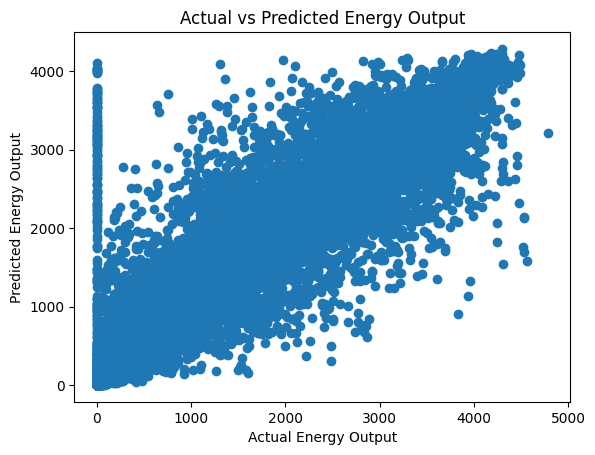

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Energy Output")
plt.ylabel("Predicted Energy Output")
plt.title("Actual vs Predicted Energy Output")
plt.show()
